In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [47]:
df=pd.read_csv('./Datasets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
df.shape

(1000, 8)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [50]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [53]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [54]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(categories=[['master\'s degree','bachelor\'s degree','associate\'s degree','some college','high school','some high school']])


In [55]:
df['parental_encoded']=encoder.fit_transform(df[['parental level of education']])

In [56]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0
1,female,group C,some college,standard,completed,69,90,88,3.0
2,female,group B,master's degree,standard,none,90,95,93,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,2.0
4,male,group C,some college,standard,none,76,78,75,3.0


In [57]:
df['parental_encoded'].rename('parental_level_encoded',inplace=True)

0      1.0
1      3.0
2      0.0
3      2.0
4      3.0
      ... 
995    0.0
996    4.0
997    4.0
998    3.0
999    3.0
Name: parental_level_encoded, Length: 1000, dtype: float64

In [58]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0
1,female,group C,some college,standard,completed,69,90,88,3.0
2,female,group B,master's degree,standard,none,90,95,93,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,2.0
4,male,group C,some college,standard,none,76,78,75,3.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0.0
996,male,group C,high school,free/reduced,none,62,55,55,4.0
997,female,group C,high school,free/reduced,completed,59,71,65,4.0
998,female,group D,some college,standard,completed,68,78,77,3.0


In [59]:
df['total_score']=df['math score']+df['reading score']+df['writing score']

In [60]:
df['total_avg_score']=df['total_score']/3

In [61]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental_encoded,total_score,total_avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,3.0,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,0.0,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,2.0,148,49.333333
4,male,group C,some college,standard,none,76,78,75,3.0,229,76.333333


<Axes: xlabel='race/ethnicity', ylabel='total_avg_score'>

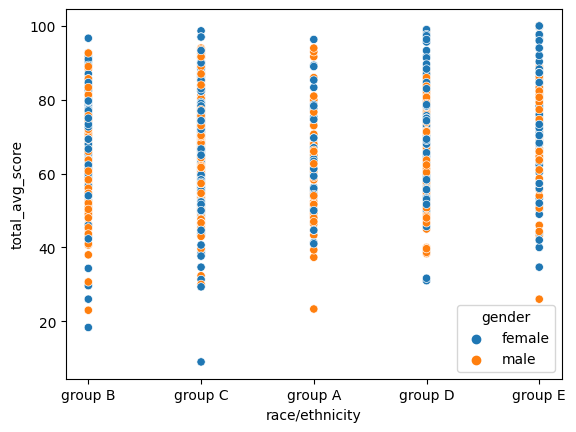

In [62]:
sns.scatterplot(x=df['race/ethnicity'],y=df['total_avg_score'],hue=df['gender'],data=df)

<BarContainer object of 1000 artists>

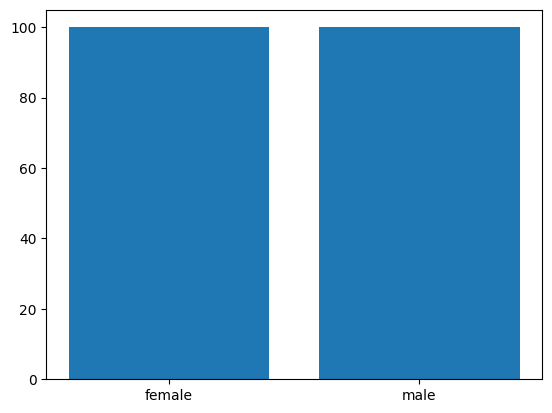

In [63]:
plt.bar(df['gender'],df['total_avg_score'])

<Axes: xlabel='total_avg_score', ylabel='Count'>

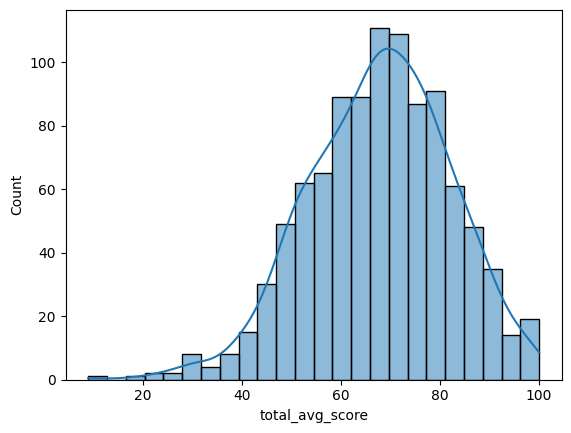

In [64]:
sns.histplot(df['total_avg_score'],kde=True)

<Axes: xlabel='total_avg_score', ylabel='Count'>

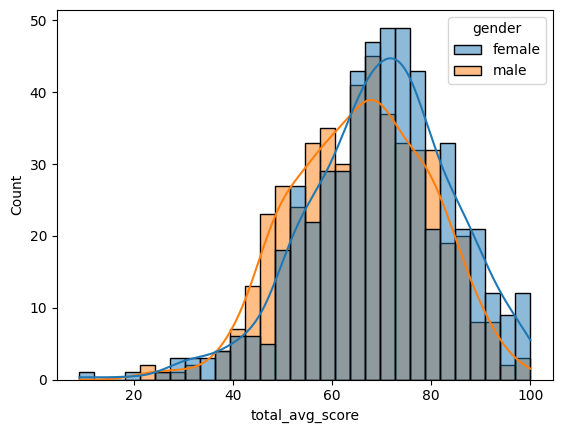

In [65]:
sns.histplot(data=df,x='total_avg_score',bins=30,hue='gender',kde=True)

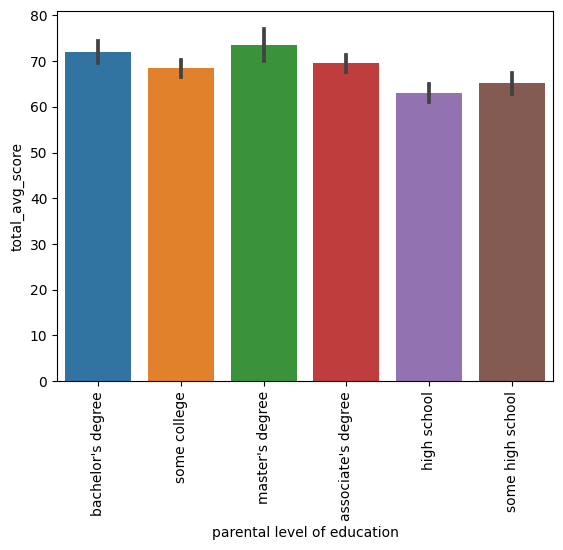

In [66]:

sns.barplot(data=df,x='parental level of education',y='total_avg_score')
plt.xticks(rotation=90)
plt.show()

<Axes: >

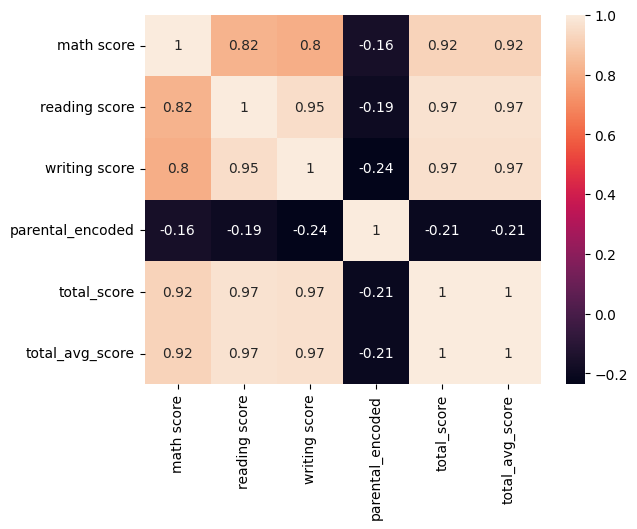

In [67]:
sns.heatmap(df.corr(numeric_only=True),annot=True)